<a href="https://colab.research.google.com/github/park-geun-hyeong/first_deeplearning_fromkeras/blob/main/keras_basic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import metrics
%config InlineBackend.figure_format='retina' #더 높은 해상도의 matplotlib 그래프를 위한 코드

In [3]:
from keras.datasets import boston_housing
(x_train,y_train),(x_test,y_test)=boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [4]:
cols=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

In [5]:
train_df=pd.DataFrame(data=x_train,columns=cols)
test_df=pd.DataFrame(data=x_test,columns=cols)

In [6]:
train_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [7]:
test_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,18.08460,0.0,18.10,0.0,0.679,6.434,100.0,1.8347,24.0,666.0,20.2,27.25,29.05
1,0.12329,0.0,10.01,0.0,0.547,5.913,92.9,2.3534,6.0,432.0,17.8,394.95,16.21
2,0.05497,0.0,5.19,0.0,0.515,5.985,45.4,4.8122,5.0,224.0,20.2,396.90,9.74
3,1.27346,0.0,19.58,1.0,0.605,6.250,92.6,1.7984,5.0,403.0,14.7,338.92,5.50
4,0.07151,0.0,4.49,0.0,0.449,6.121,56.8,3.7476,3.0,247.0,18.5,395.15,8.44


In [8]:
train_df.shape

(404, 13)

In [9]:
test_df.shape

(102, 13)

In [10]:
x_train_crim=x_train[:,0]
x_test_crim=x_test[:,0]

In [21]:
x_train_crim=train_df['CRIM'].values
x_test_crim=test_df['CRIM'].values

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

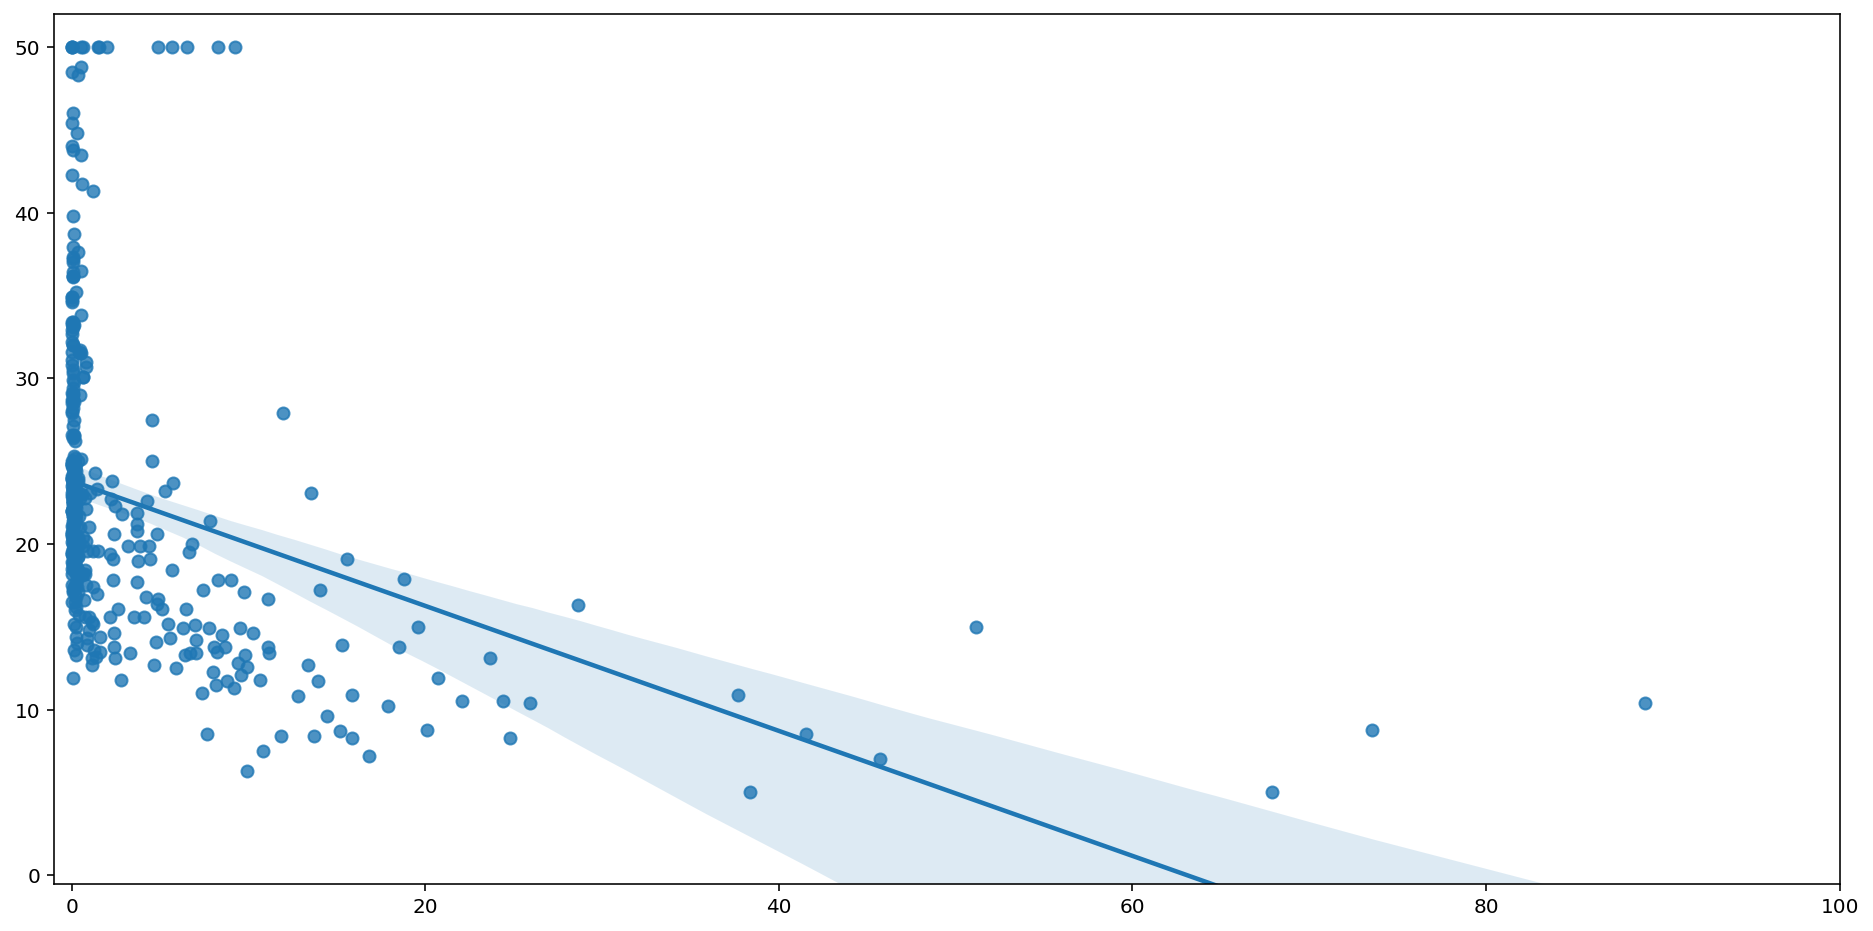

In [12]:
plt.figure(figsize=(16,8))
plt.axis([-1,100,-0.5,52])
sns.regplot(x_train_crim,y_train)
plt.show

In [13]:
inputs=Input(shape=(1,))

In [14]:
fc1=Dense(10,activation='relu')(inputs)
fc2=Dense(30,activation='relu')(fc1)
outputs=Dense(1)(fc2)

model=Model(inputs,outputs)

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 381
Trainable params: 381
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='RMSprop',loss='mean_squared_error')

In [17]:
histroy=model.fit(x_train_crim,y_train,epochs=30,batch_size=8)

Epoch 1/30
51/51 [==============================] - 1s 1ms/step - loss: 582.3826
Epoch 2/30
51/51 [==============================] - 0s 971us/step - loss: 549.8122
Epoch 3/30
51/51 [==============================] - 0s 1ms/step - loss: 589.8137
Epoch 4/30
51/51 [==============================] - 0s 1ms/step - loss: 522.4182
Epoch 5/30
51/51 [==============================] - 0s 1ms/step - loss: 464.4911
Epoch 6/30
51/51 [==============================] - 0s 1ms/step - loss: 479.8008
Epoch 7/30
51/51 [==============================] - 0s 1ms/step - loss: 454.3246
Epoch 8/30
51/51 [==============================] - 0s 975us/step - loss: 451.0701
Epoch 9/30
51/51 [==============================] - 0s 1ms/step - loss: 469.5341
Epoch 10/30
51/51 [==============================] - 0s 1ms/step - loss: 447.7411
Epoch 11/30
51/51 [==============================] - 0s 1ms/step - loss: 406.5778
Epoch 12/30
51/51 [==============================] - 0s 1ms/step - loss: 436.5764
Epoch 13/30
51/51 [==

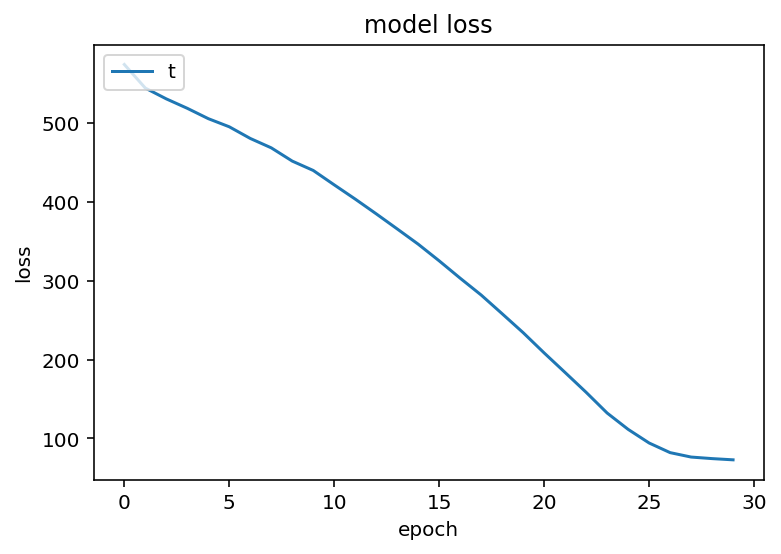

In [18]:
plt.plot(histroy.history['loss'])
plt.xlabel("epoch")
plt.ylabel('loss')
plt.title("model loss")
plt.legend("train",loc='upper left')
plt.show()

In [19]:
def create_model(input_shape):
    inputs=Input(shape=(input_shape,))
    fc1=Dense(10,activation='relu')(inputs)
    fc2=Dense(30,activation='relu')(fc1)
    outputs=Dense(1)(fc2)
    model=Model(inputs=inputs,outputs=outputs)
    return model

In [20]:
model=create_model(1)
model.compile(optimizer='RMSprop',loss='mean_squared_error')

In [22]:
history = model.fit(x_train_crim,y_train,validation_data=(x_test_crim,y_test),epochs=30,batch_size=8)

Epoch 1/30
51/51 [==============================] - 1s 9ms/step - loss: 558.7015 - val_loss: 568.3787
Epoch 2/30
51/51 [==============================] - 0s 2ms/step - loss: 522.6971 - val_loss: 545.9719
Epoch 3/30
51/51 [==============================] - 0s 2ms/step - loss: 542.0758 - val_loss: 529.6626
Epoch 4/30
51/51 [==============================] - 0s 2ms/step - loss: 518.8950 - val_loss: 513.2849
Epoch 5/30
51/51 [==============================] - 0s 2ms/step - loss: 499.9841 - val_loss: 497.0259
Epoch 6/30
51/51 [==============================] - 0s 2ms/step - loss: 487.0126 - val_loss: 476.8873
Epoch 7/30
51/51 [==============================] - 0s 2ms/step - loss: 446.0767 - val_loss: 457.0296
Epoch 8/30
51/51 [==============================] - 0s 2ms/step - loss: 461.6653 - val_loss: 435.5950
Epoch 9/30
51/51 [==============================] - 0s 2ms/step - loss: 426.2622 - val_loss: 412.4398
Epoch 10/30
51/51 [==============================] - 0s 2ms/step - loss: 399.6250 

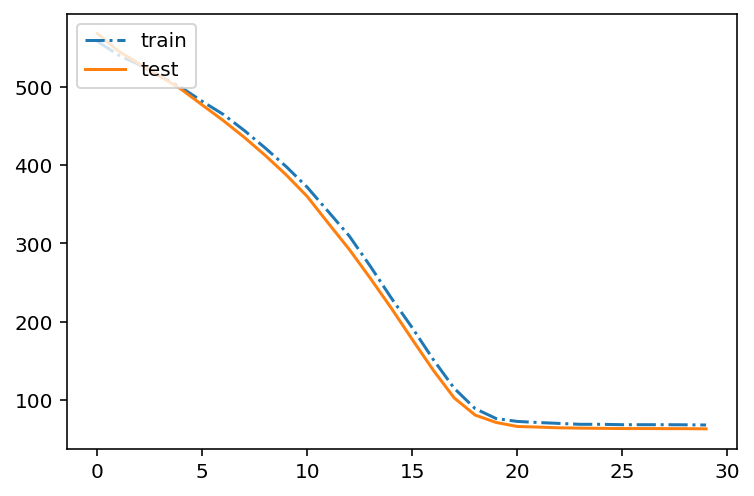

In [23]:
plt.plot(history.history['loss'],'-.')
plt.plot(history.history['val_loss'],'-')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [24]:
x_train_four=train_df[['CRIM','RM','AGE','PTRATIO']].values
x_test_four=test_df[['CRIM','RM','AGE','PTRATIO']].values

In [25]:
model=create_model(4)

In [26]:
model.compile(optimizer='RMSprop',loss='mean_squared_error')


In [27]:
history=model.fit(x_train_four,y_train,validation_data=(x_test_four,y_test),epochs=30,batch_size=8)

Epoch 1/30
51/51 [==============================] - 1s 6ms/step - loss: 253.9002 - val_loss: 173.9143
Epoch 2/30
51/51 [==============================] - 0s 2ms/step - loss: 163.4063 - val_loss: 144.4620
Epoch 3/30
51/51 [==============================] - 0s 2ms/step - loss: 139.9414 - val_loss: 120.7275
Epoch 4/30
51/51 [==============================] - 0s 2ms/step - loss: 112.5548 - val_loss: 99.8134
Epoch 5/30
51/51 [==============================] - 0s 2ms/step - loss: 119.8977 - val_loss: 89.0399
Epoch 6/30
51/51 [==============================] - 0s 2ms/step - loss: 107.4048 - val_loss: 89.2648
Epoch 7/30
51/51 [==============================] - 0s 2ms/step - loss: 85.6442 - val_loss: 79.5573
Epoch 8/30
51/51 [==============================] - 0s 2ms/step - loss: 80.9711 - val_loss: 76.9957
Epoch 9/30
51/51 [==============================] - 0s 2ms/step - loss: 71.8633 - val_loss: 75.5309
Epoch 10/30
51/51 [==============================] - 0s 2ms/step - loss: 73.5946 - val_loss

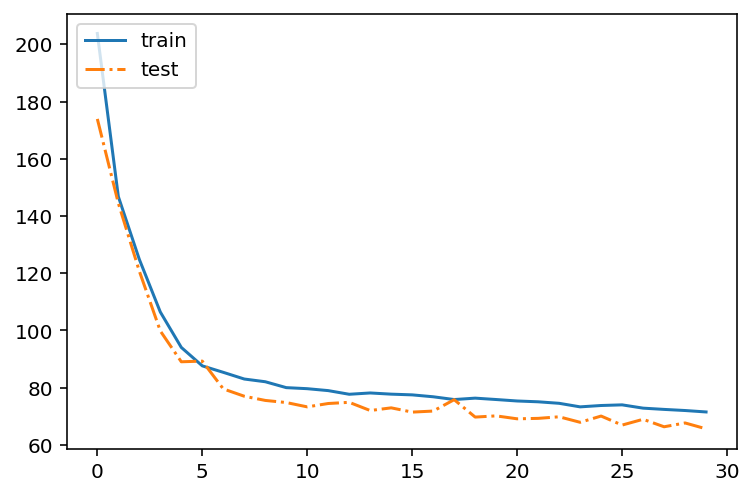

In [31]:
plt.plot(history.history['loss'],'-')
plt.plot(history.history['val_loss'],'-.')
plt.legend(['train','test'],loc='upper left')
plt.show()